In [28]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

places = gpd.read_file(r"C:\Users\jaely\OneDrive\Documents\AES408\cb_2024_01_place_500k\cb_2024_01_place_500k.shp")
states = gpd.read_file(r"C:\Users\jaely\OneDrive\Documents\AES408\cb_2024_us_state_500k\cb_2024_us_state_500k.shp")

print(places.head())
print(places.columns)
print(places.crs)


  STATEFP PLACEFP   PLACENS           GEOIDFQ    GEOID        NAME  \
0      01   32704  02403782  1600000US0132704  0132704  Haleyville   
1      01   45472  02406131  1600000US0145472  0145472    McIntosh   
2      01   53784  02406982  1600000US0153784  0153784     Newbern   
3      01   78204  02405634  1600000US0178204  0178204      Valley   
4      01   02836  02405172  1600000US0102836  0102836     Ashford   

          NAMELSAD STUSPS STATE_NAME LSAD     ALAND  AWATER  \
0  Haleyville city     AL    Alabama   25  21713018  130983   
1    McIntosh town     AL    Alabama   43   2579767       0   
2     Newbern town     AL    Alabama   43   3010370    6872   
3      Valley city     AL    Alabama   25  33384157       0   
4     Ashford city     AL    Alabama   25  16064130   56699   

                                            geometry  
0  MULTIPOLYGON (((-87.60417 34.24614, -87.60201 ...  
1  POLYGON ((-88.03726 31.27171, -88.03112 31.271...  
2  POLYGON ((-87.54125 32.60104, -8

In [29]:
places = places.to_crs(epsg=5070)

places["area"]= places.geometry.area
places["perimeter"] = places.geometry.length

places["cirularity"] = (4 * np.pi * places["area"]) / (places["perimeter"] ** 2)

circular_towns = places[places["cirularity"] > 0.80]

print(circular_towns[["NAME", "cirularity"]])

               NAME  cirularity
256          Oakman    0.992406
289       Goldville    0.984679
383  Coffee Springs    0.979161
386        Brantley    0.993601


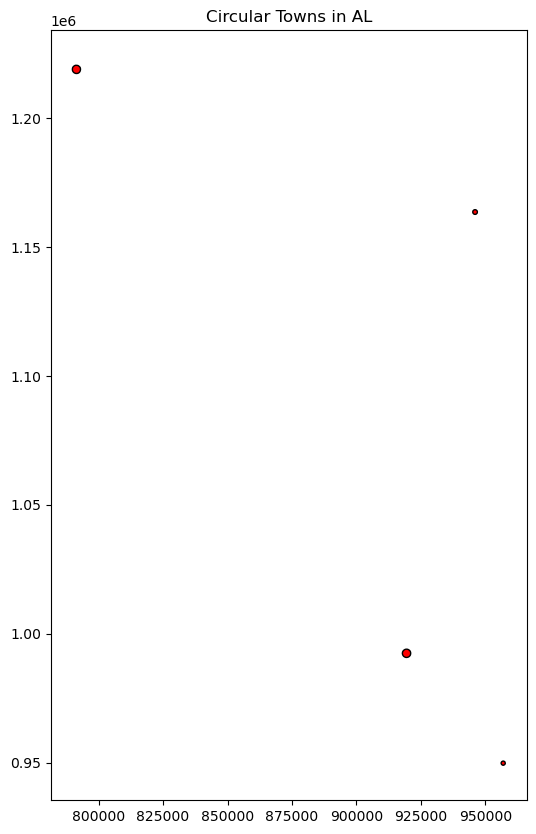

In [30]:

#Failed attempt 
fig, ax = plt.subplots(figsize=(10, 10))
circular_towns.plot(ax=ax, color="red", edgecolor="black")
plt.title("Circular Towns in AL") 
plt.show()

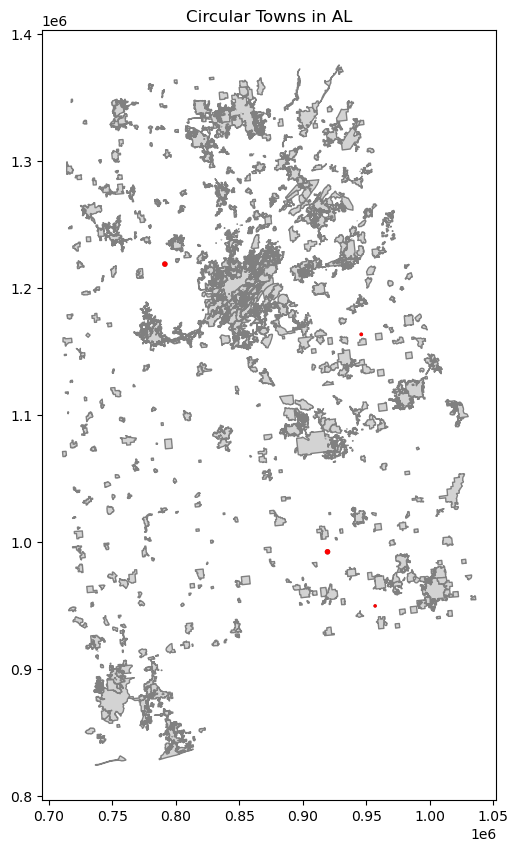

In [ ]:
#better attempt
fig, ax = plt.subplots(figsize=(10, 10))
places.plot(ax=ax, color="lightgray", edgecolor="gray")
circular_towns.plot(ax=ax, color="red", edgecolor="red")
plt.title("Circular Towns in AL") 
plt.show()

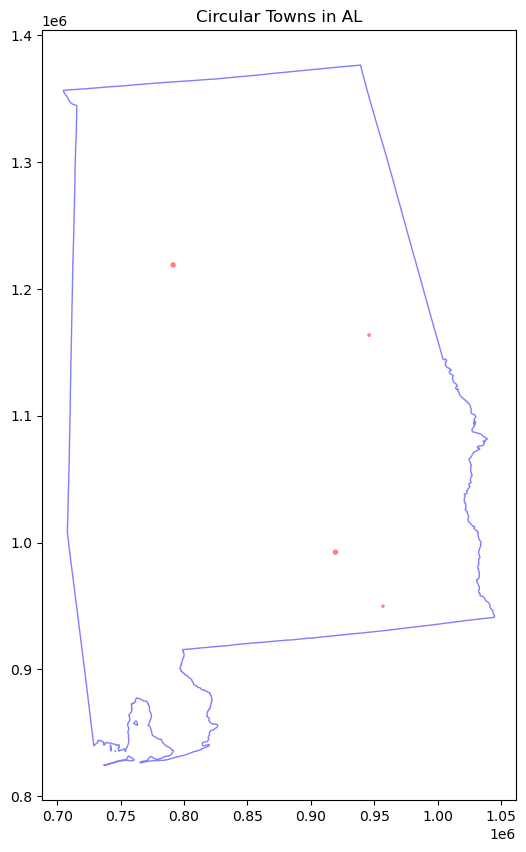

In [ ]:
#Best attempt
states = states.to_crs(epsg=5070)
states = states[states["STUSPS"] == "AL"]
fig, ax = plt.subplots(figsize=(10, 10))
circular_towns.plot(ax=ax, color="red", edgecolor="red")
states.plot(ax=ax, color="white", edgecolor="blue", alpha=0.5)
plt.title("Circular Towns in AL") 
plt.show()

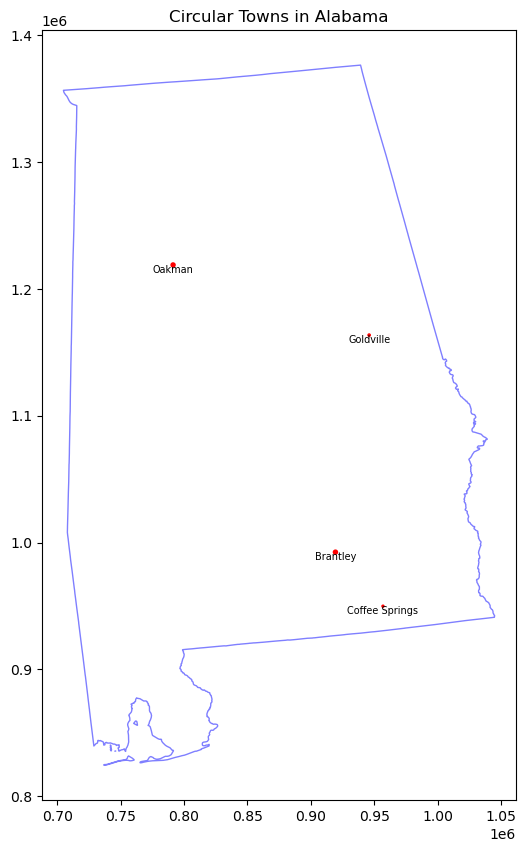

In [44]:
fig, ax = plt.subplots(figsize=(10, 10))
states.plot(ax=ax, color="white", edgecolor="blue", alpha=0.5)
circular_towns.plot(ax=ax, color="red", edgecolor="red")
for idx, row in circular_towns.iterrows():
    x, y = row.geometry.centroid.coords[0]
    ax.text(x, y,row["NAME"],fontsize=7,ha="center",va="top")
plt.title("Circular Towns in Alabama")
plt.show()